## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_df.head()
# Display the data table for preview


Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [2]:
# Checking the number of mice.
mouse_df["Mouse ID"].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
time_point = mouse_df.groupby("Timepoint")
time_point_df = pd.DataFrame(time_point["Mouse ID"].value_counts())
time_point_df


Mouse ID
Timepoint Mouse ID          
0         g989             2
          a203             1
          a251             1
          a262             1
          a275             1
...                      ...
45        y865             1
          z578             1
          z581             1
          z795             1
          z969             1

[1888 rows x 1 columns]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = mouse_df[mouse_df.duplicated()]
duplicate


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   

     Tumor Volume (mm3)  Metastatic Sites  
909                45.0                 0

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dup_mice = mouse_df.drop_duplicates(keep=False, inplace=True)
dup_mice

In [6]:
# Checking the number of mice in the clean DataFrame.
time_point = mouse_df.groupby("Timepoint")
time_point_df = pd.DataFrame(time_point["Mouse ID"].value_counts())
time_point_df

Mouse ID
Timepoint Mouse ID          
0         a203             1
          a251             1
          a262             1
          a275             1
          a366             1
...                      ...
45        y865             1
          z578             1
          z581             1
          z795             1
          z969             1

[1887 rows x 1 columns]

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_group = mouse_df.groupby("Drug Regimen")
summary_mean = summary_group["Tumor Volume (mm3)"].mean()
summary_median = summary_group["Tumor Volume (mm3)"].median()
summary_std = summary_group["Tumor Volume (mm3)"].std()
summary_var = summary_group["Tumor Volume (mm3)"].var()
summary_mean_st = pd.DataFrame(summary_mean)
summary_mean_st.columns = ["Mean Tumor Volume"]
summary_median_st = pd.DataFrame(summary_median)
summary_median_st.columns = ["Median Tumor Volume"]
summary_std_st = pd.DataFrame(summary_std)
summary_std_st.columns = ["Tumor Volume Std. Dev"]
summary_var_st = pd.DataFrame(summary_var)
summary_var_st.columns = ["Tumor Volume Variance"]



# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



summary_statistics = summary_mean_st.copy() 
summary_statistics["Median Tumor Volume"] = summary_median_st["Median Tumor Volume"]
summary_statistics["Tumor Volume Std. Dev"] = summary_std_st["Tumor Volume Std. Dev"]
summary_statistics["Tumor Volume Variance"] = summary_var_st["Tumor Volume Variance"]                                              
summary_statistics = summary_statistics.reset_index()
summary_statistics

Drug Regimen  Mean Tumor Volume  Median Tumor Volume  Tumor Volume Std. Dev  \
0    Capomulin          40.675741            41.557809               4.994774   
1     Ceftamin          52.591172            51.776157               6.268188   
2    Infubinol          52.884795            51.820584               6.567243   
3     Ketapril          55.235638            53.698743               8.279709   
4     Naftisol          54.331565            52.509285               8.134708   
5      Placebo          54.033581            52.288934               7.821003   
6     Propriva          52.414660            50.965298               6.496144   
7     Ramicane          40.216745            40.673236               4.846308   
8     Stelasyn          54.233149            52.431737               7.710419   
9    Zoniferol          53.236507            51.818479               6.966589   

   Tumor Volume Variance  
0              24.947764  
1              39.290177  
2              43.128684  
3              68.553577  
4              66.173479  
5              61.168083  
6              42.199890  
7              23.486704  
8              59.450562  
9              48.533355

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

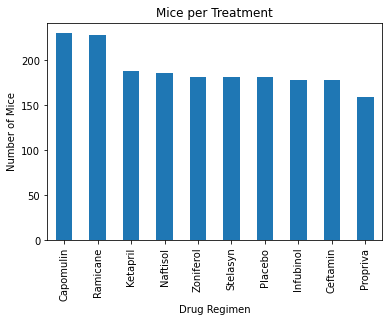

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
time_refrence = mouse_df.groupby('Drug Regimen')
time_refrence_count = time_refrence['Mouse ID'].count()
order = time_refrence_count.sort_values(ascending = False)
mice_chart = order.plot(kind="bar", title="Mice per Treatment")
mice_chart.set_xlabel("Drug Regimen")
mice_chart.set_ylabel("Number of Mice")
plt.show()


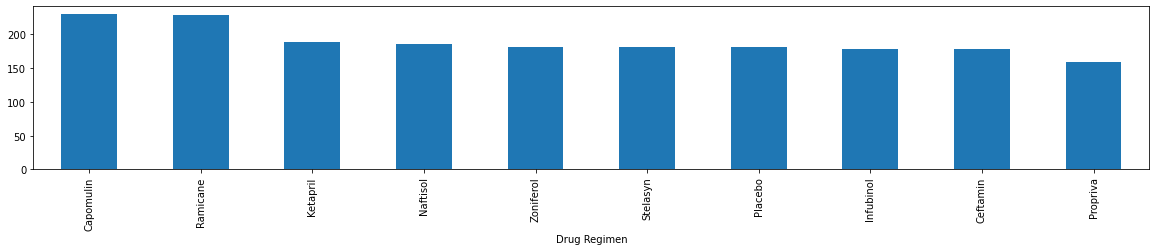

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

time_refrence = mouse_df.groupby('Drug Regimen')
count_mice = time_refrence['Mouse ID'].count()
order = count_mice.sort_values(ascending = False)
order.plot(kind='bar', figsize = (20,3))
    
#order.set_xlabel("Treatment")
#order.set_ylabel("Number of Mice")

plt.show()
plt.tight_layout()


In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

lb_treat = mouse_df.groupby('Sex')
count_mouse = lb_treat['Mouse ID'].count()
treatment = count_mouse.reset_index()["Sex"].to_list()
colors = ["Gold","Purple"]
plt.pie(count_mouse, labels=treatment, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")

(-1.1056031302324567,
 1.102935641318436,
 -1.1048958498515298,
 1.100233161810833)

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
lb_treat = mouse_df.groupby('Sex')
count_mouse = lb_treat['Mouse ID'].count()
treatment = count_mouse.reset_index()["Sex"].to_list()
colors = ["GOLD","PURPLE"]
explode = (0.1,0)
plt.pie(count_mouse,explode = explode, labels=treatment, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")

(-1.2105804901246933,
 1.1079345632180662,
 -1.1049996746207027,
 1.1024134819634648)

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
grouping_mice = mouse_df.groupby("Mouse ID").max()
grouping_mice = grouping_mice.reset_index()
merge= pd.merge(grouping_mice[["Mouse ID", "Timepoint"]], mouse_df, on=["Mouse ID", "Timepoint"],how="left")
capomulin_df = merge.loc[merge["Drug Regimen"] == "Capomulin", :]
tumor_volume = capomulin_df["Tumor Volume (mm3)"]
quartiles = tumor_volume.quantile([.25,.5,.75])
lowerquart= quartiles[0.25]
upperquart= quartiles[0.75]
IQR = upperq -  lowerq
upper_bound = upperquart + (1.5*IQR)
lower_bound = lowerquart - (1.5*IQR)


print(f"The interquartile range of final tumor volume is: {IQR}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The interquartile range of final tumor volume is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

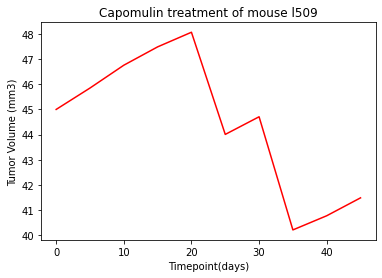

In [24]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
group_mouse = mouse_df.loc[(mouse_df["Mouse ID"] == "l509"),:]
time_point = group_mouse["Tumor Volume (mm3)"]
tumor_volume = group_mouse["Timepoint"]
line_plot = plt.plot(tumor_volume, time_point, color = "red")
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Capomulin treatment of mouse l509")
plt.show()

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = mouse_df.loc[mouse_df["Drug Regimen"] == "Capomulin", :]
group_drug =capomulin_df.groupby("Mouse ID")
avg_vol_df = pd.DataFrame(group_drug["Tumor Volume (mm3)"].mean())
weight_df = pd.DataFrame(group_drug["Weight (g)"].mean())
plt.scatter(weight_df,avg_vol_df)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.show()

## Correlation and Regression

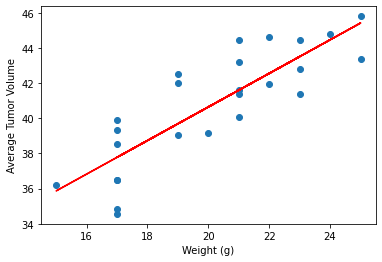

The correlation between mouse weight and the average tumor volume is 0.84


In [27]:
# Calculate the correlation coefficient and linear regression model 

x_values = group_drug["Weight (g)"].mean()
y_values = group_drug["Tumor Volume (mm3)"].mean()
(w_slope, w_int, w_r, w_p, w_std_err) = st.linregress(x_values, y_values)
regress_values = weight_df * w_slope + w_int
line_eq = "y = " + str(round(w_slope,2)) + "x + " + str(round(w_int,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

# for mouse weight and average tumor volume for the Capomulin regimen
plt.ylabel('Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.show()
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")